In [27]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

# Importing dataset
data = pd.read_csv("marketing_campaign.csv", sep= "\t")
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [28]:
##-------- CLEANING & MANIPULATING THE DATA -------##

# Dropping unrequired columns 
data = data.drop(columns = ["ID","Recency", "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", 
          "AcceptedCmp1", "AcceptedCmp2", "Z_CostContact", "Z_Revenue",
          "Response"])


# Adding extra features for total number of kids, has kids, total spent & age when a customer

data["Num_children"] = data["Kidhome"] + data["Teenhome"]

data["Has_children"] = data.apply(lambda x : 1 if x["Num_children"] > 0 else 0, axis=1 )

data["Total_spend"] = data["MntFishProducts"] + data["MntFruits"] + \
data["MntGoldProds"] + data["MntMeatProducts"] + data["MntSweetProducts"] + \
data["MntWines"]

data["Dt_Customer"] = data["Dt_Customer"].astype("datetime64[ns]") # Converting to datetime 
data["Age_customer"] = data["Dt_Customer"].dt.year - data["Year_Birth"]

data.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Num_children,Has_children,Total_spend,Age_customer
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,635,88,546,...,88,3,8,10,4,0,0,0,1617,55
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,11,1,6,...,6,2,1,1,2,0,2,1,27,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,...,42,1,8,2,10,0,0,0,776,48
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,11,4,20,...,5,2,2,0,4,0,1,1,53,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,...,15,5,5,3,6,0,1,1,422,33


In [29]:
# Summary statistics
data.describe()


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Num_children,Has_children,Total_spend,Age_customer
count,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-11 22:57:38.571428608,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,0.009375,0.950446,0.715179,605.798214,44.222321
min,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,16.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-19 18:00:00,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,68.750000,36.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,0.000000,1.000000,1.000000,396.000000,43.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,0.000000,1.000000,1.000000,1045.500000,54.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,1.000000,3.000000,1.000000,2525.000000,121.000000
std,11.984069,25173.076661,0.538398,0.544538,NaN,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,0.096391,0.751803,0.451430,602.249288,12.022855


In [30]:
# Find &remove missing values
data.isna().sum()
data = data.dropna()
data.isna().sum()


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Complain               0
Num_children           0
Has_children           0
Total_spend            0
Age_customer           0
dtype: int64

In [31]:
##-------- EXPLORATORY DATA ANALYSIS-------##

# Setting plot theme
sns.set_theme()
sns.set_palette("Set2")

# Defining list of categorical & continuous variables
cat_param="Marital_Status","Education","Has_children","Complain"
con_param="Age_customer","Income","Total_spend","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"


C:\Users\windh\AppData\Local\Temp\ipykernel_11044\1026187722.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_11044\1026187722.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


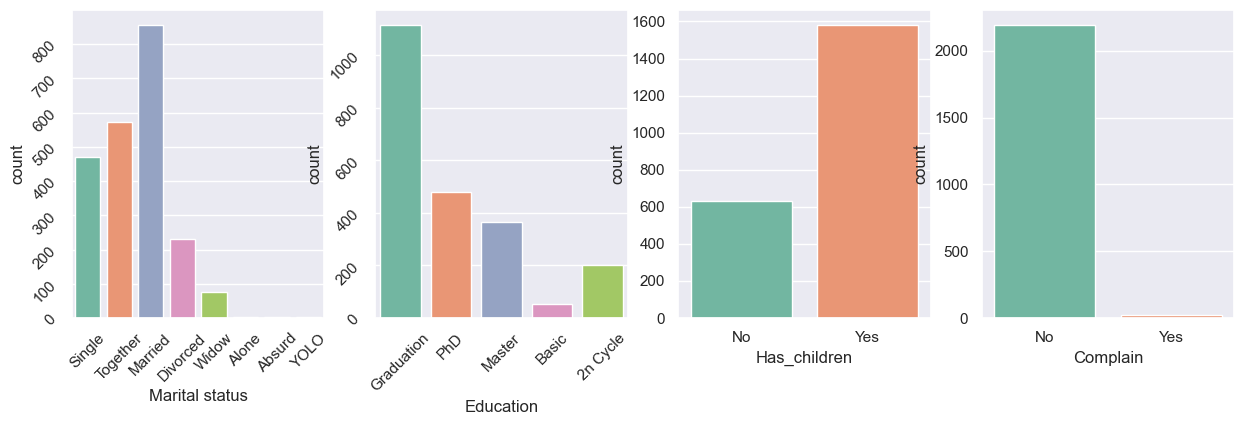

In [32]:
# Plotting categorical data
fig, ax = plt.subplots(1,ncols=len(cat_param), figsize=(15,4))

for i in enumerate(cat_param):
    sns.countplot(data,x=i[1],hue=i[1],ax=ax[i[0]])


# Setting plot parameters 
ax[0].tick_params(rotation=45)
ax[0].set_xlabel("Marital status")

ax[1].tick_params(rotation=45)

ax[2].set_xticklabels(["No","Yes"])
ax[2].get_legend().remove()

ax[3].set_xticklabels(["No","Yes"])
ax[3].get_legend().remove()

plt.show()


It appears that in the dataset, the most common type of customers are those who are married, have an undergraduate degree, has never made a complaint in two years, and/or has at least one child. There are large gaps between the number of customers' education levels, complaints made and presence of children. However, the gap between customers' marital status are less wide, at least for the three most common marital statuses(Married>Together>Single). 

Also, there appears to be several marital statuses with barely any counts (Alone, Absurd and YOLO), which should probably be treated as outliers and removed

C:\Users\windh\AppData\Local\Temp\ipykernel_11044\2882187488.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_11044\2882187488.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


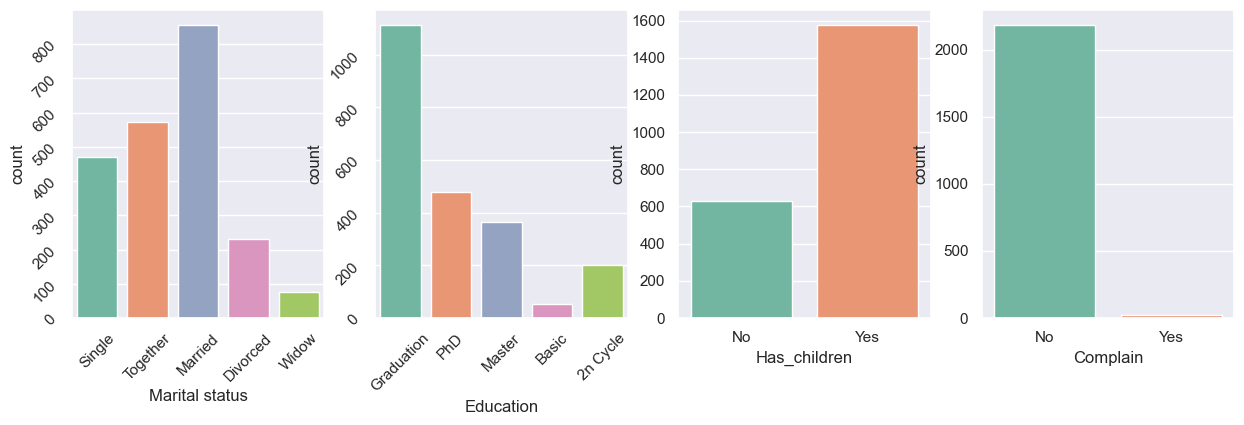

In [33]:
# Dropping datapoints with marital status 'Alone', 'Absurd' and 'YOLO'
data = data.loc[~((data['Marital_Status'] == 'Alone') | (data['Marital_Status']== "Absurd") | (data['Marital_Status']== "YOLO"))]


# Plotting the barplots again without the 'Alone', 'Absurd' and 'YOLO' marital statuses
fig, ax = plt.subplots(1,ncols=len(cat_param), figsize=(15,4))

for i in enumerate(cat_param):
    sns.countplot(data,x=i[1],hue=i[1],ax=ax[i[0]])


# Setting plot parameters 
ax[0].tick_params(rotation=45)
ax[0].set_xlabel("Marital status")

ax[1].tick_params(rotation=45)

ax[2].set_xticklabels(["No","Yes"])
ax[2].get_legend().remove()

ax[3].set_xticklabels(["No","Yes"])
ax[3].get_legend().remove()

plt.show()

Text(0.5, 0, 'Total spend')

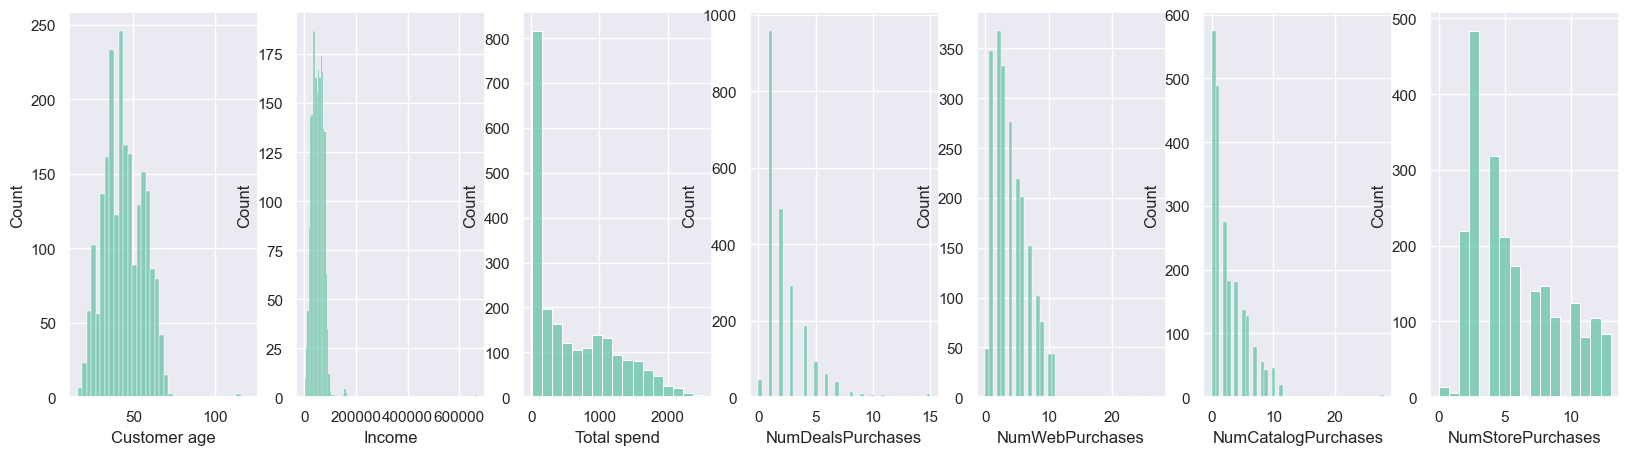

In [34]:
# Plotting histograms for non-categorical data
fig, ax = plt.subplots(1,ncols=len(con_param), figsize=(20, 5))

for i in enumerate(con_param):
    sns.histplot(data,x=i[1],ax=ax[i[0]])

# Setting plot parameters
ax[0].set_xlabel("Customer age")
ax[2].set_xlabel("Total spend")


There appear to be outliers in income & age, so we will remove them...

In [35]:
# Removing outliers
data = data[data["Age_customer"]<100]
data = data[data["Income"]<200000]

# Testing that all outliers removed 
(data["Age_customer"]>100).sum() + (data["Income"]>200000).sum()


0

Text(0.5, 0, 'Total spend')

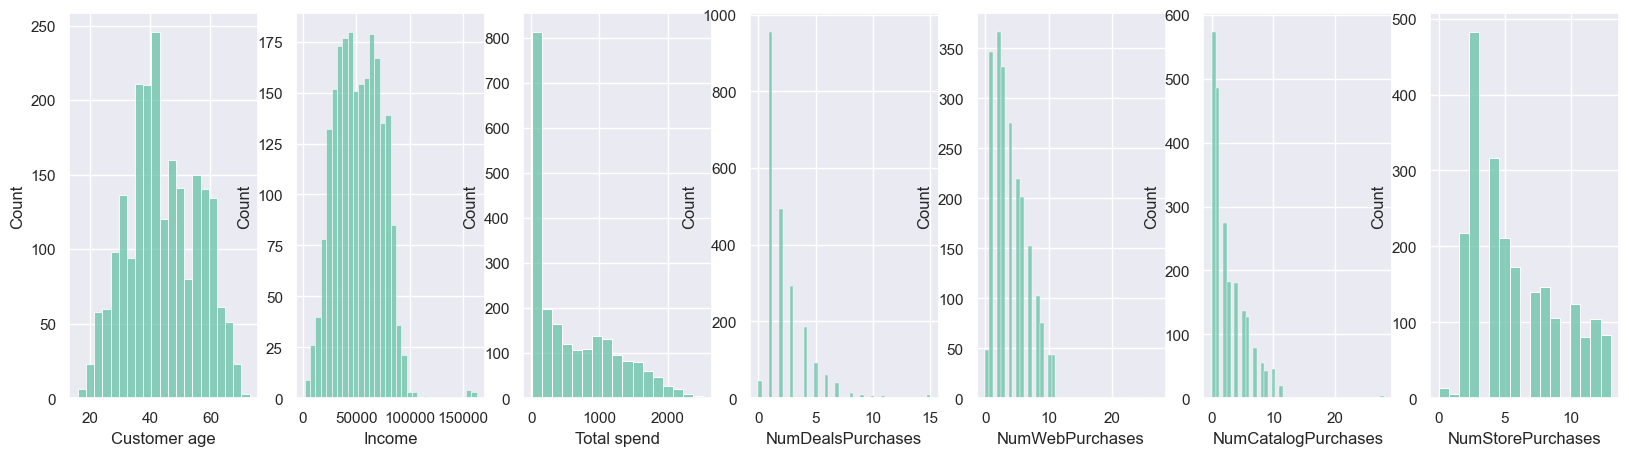

In [36]:
# Plotting data with outliers removed 
fig, ax = plt.subplots(1,ncols=len(con_param), figsize=(20, 5))

for i in enumerate(con_param):
    sns.histplot(data,x=i[1],ax=ax[i[0]])

# Setting plot parameters
ax[0].set_xlabel("Customer age")
ax[2].set_xlabel("Total spend")


C:\Users\windh\AppData\Local\Temp\ipykernel_11044\1432347576.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_11044\1432347576.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


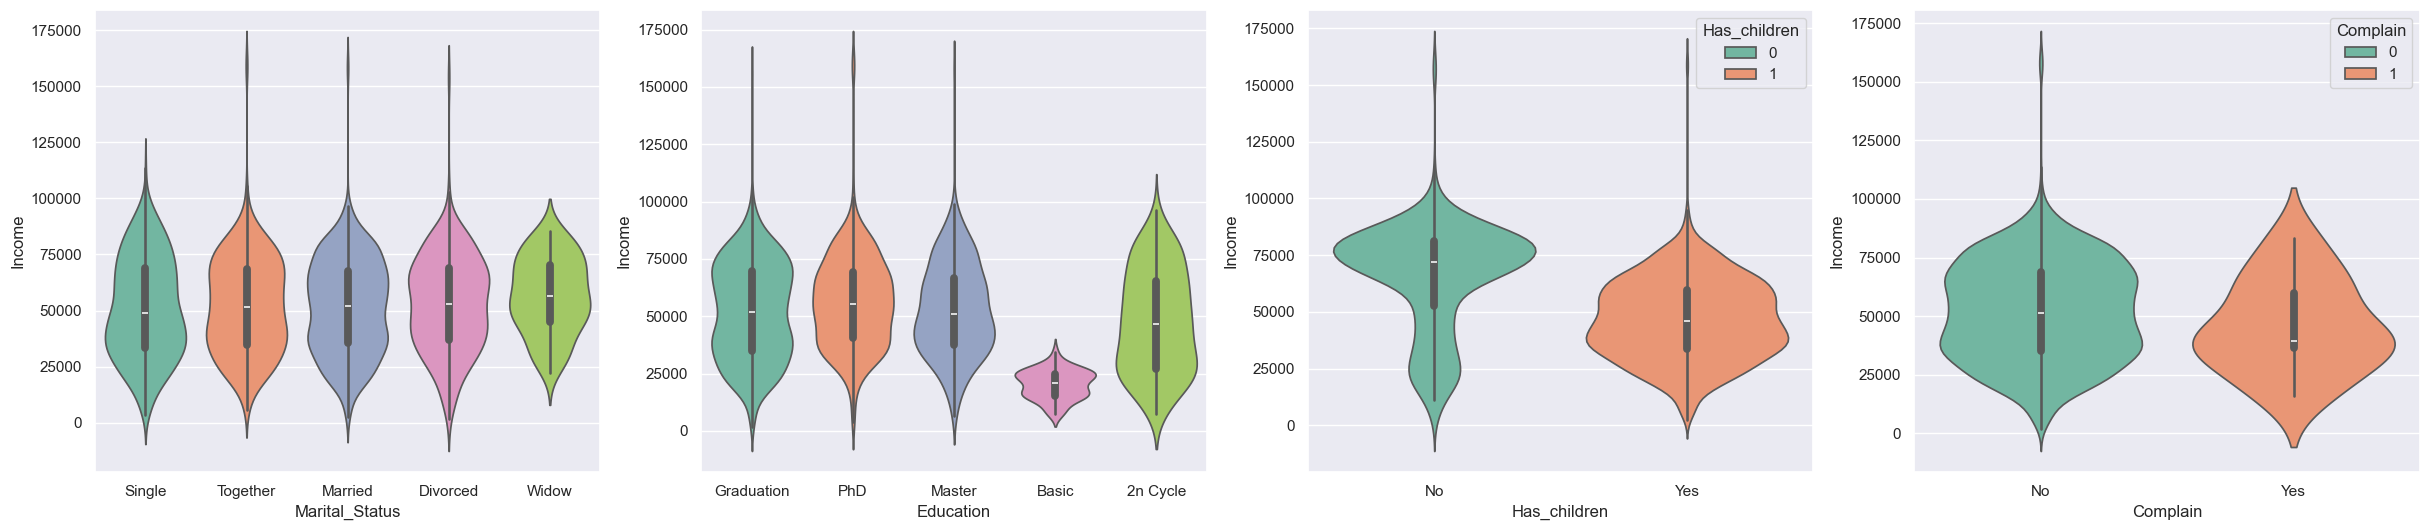

In [37]:
# Violin plots to see distribution of income based on categorical parameters
fig, ax = plt.subplots(nrows=1,ncols=len(cat_param), figsize = (30,6))

for i in enumerate(cat_param):
    sns.violinplot(data, x=i[1], y="Income",hue=i[1],ax=ax[i[0]])

ax[2].set_xticklabels(["No","Yes"])
ax[3].set_xticklabels(["No","Yes"])
plt.show()


C:\Users\windh\AppData\Local\Temp\ipykernel_11044\3399356070.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_11044\3399356070.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


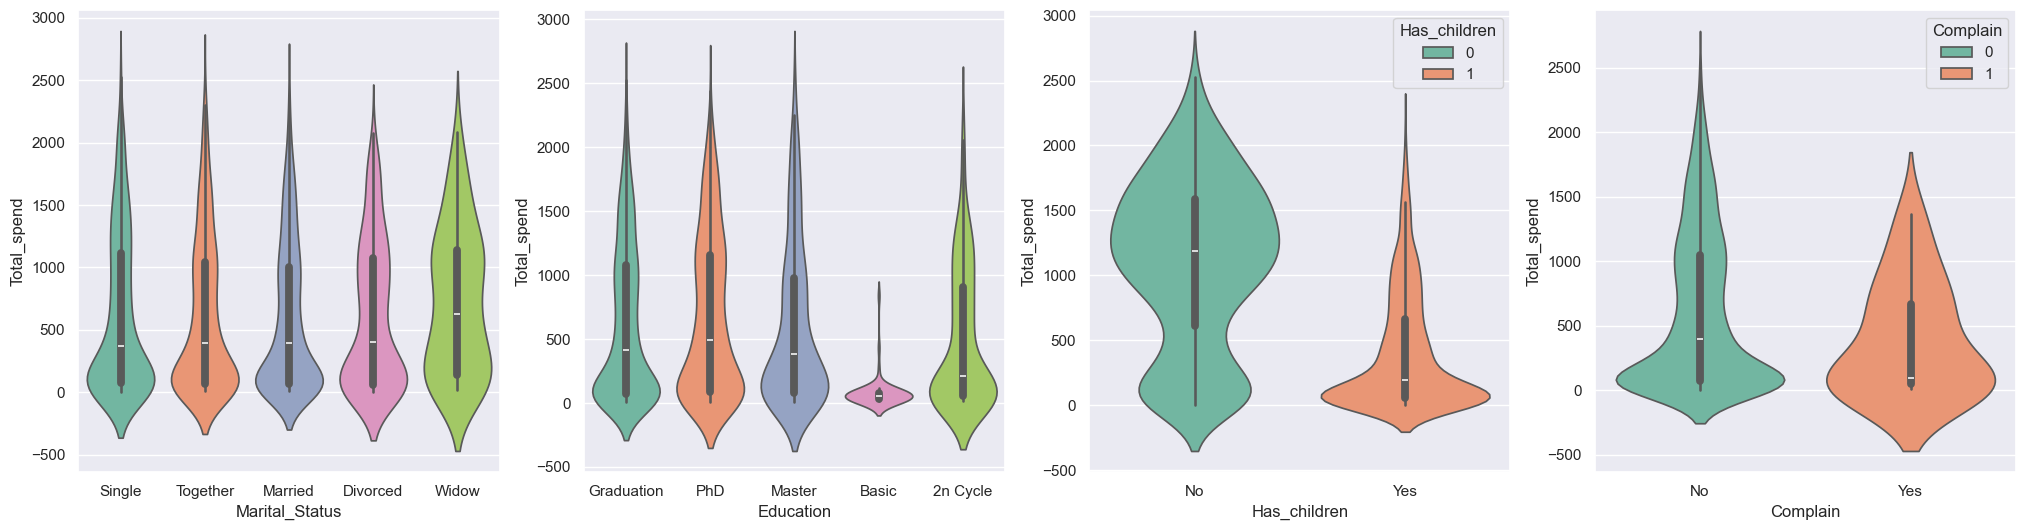

In [38]:
# Violin plots to see distribution of total spend based on categorical parameters 
fig, ax = plt.subplots(nrows=1,ncols=len(cat_param), figsize = (25,6))

for i in enumerate(cat_param):
    sns.violinplot(data, x=i[1], y="Total_spend",hue=i[1],ax=ax[i[0]])

ax[2].set_xticklabels(["No","Yes"])
ax[3].set_xticklabels(["No","Yes"])
plt.show()

C:\Users\windh\AppData\Local\Temp\ipykernel_11044\2089151962.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_11044\2089151962.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


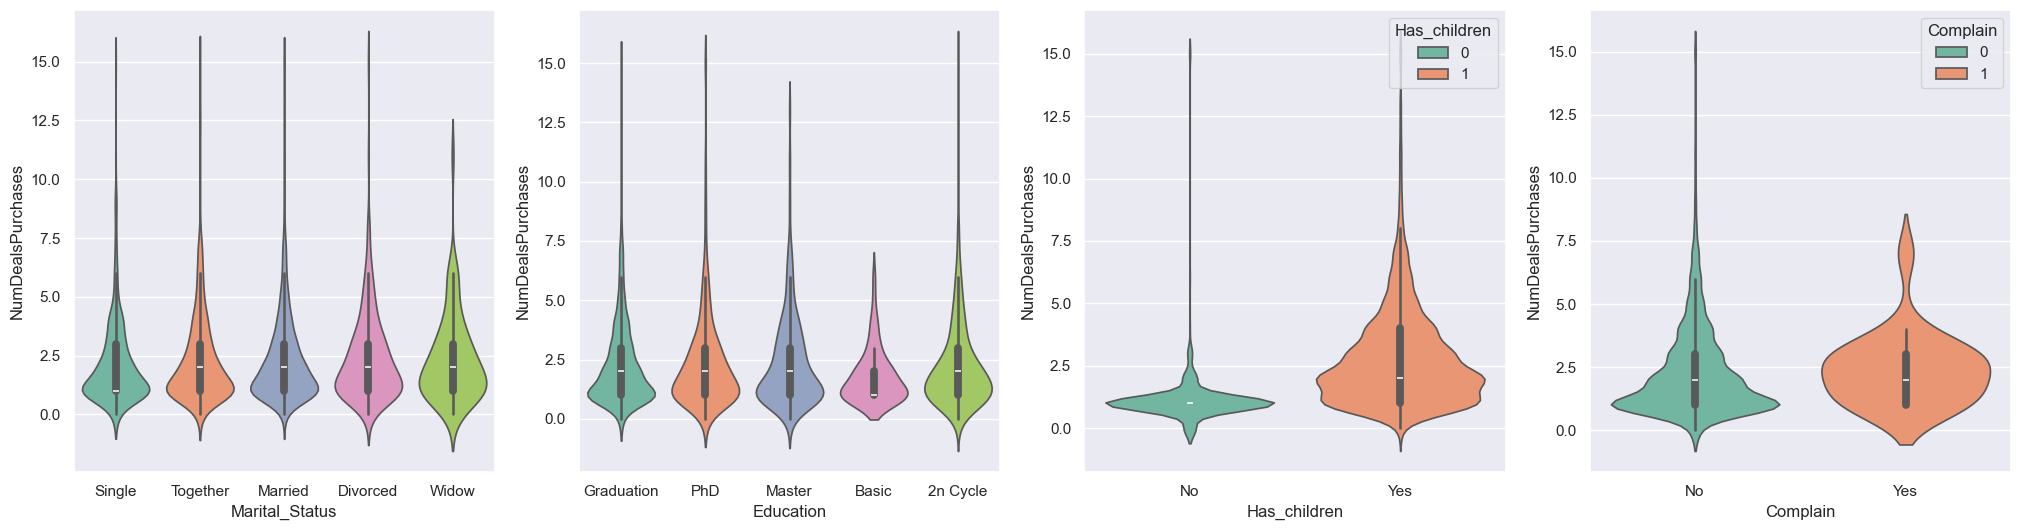

In [39]:
# Violin plots to see distribution of deals purchased based on categorical parameters 
fig, ax = plt.subplots(nrows=1,ncols=len(cat_param), figsize = (25,6))

for i in enumerate(cat_param):
    sns.violinplot(data, x=i[1], y="NumDealsPurchases",hue=i[1],ax=ax[i[0]])

ax[2].set_xticklabels(["No","Yes"])
ax[3].set_xticklabels(["No","Yes"])
plt.show()

C:\Users\windh\AppData\Local\Temp\ipykernel_11044\897560897.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_11044\897560897.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


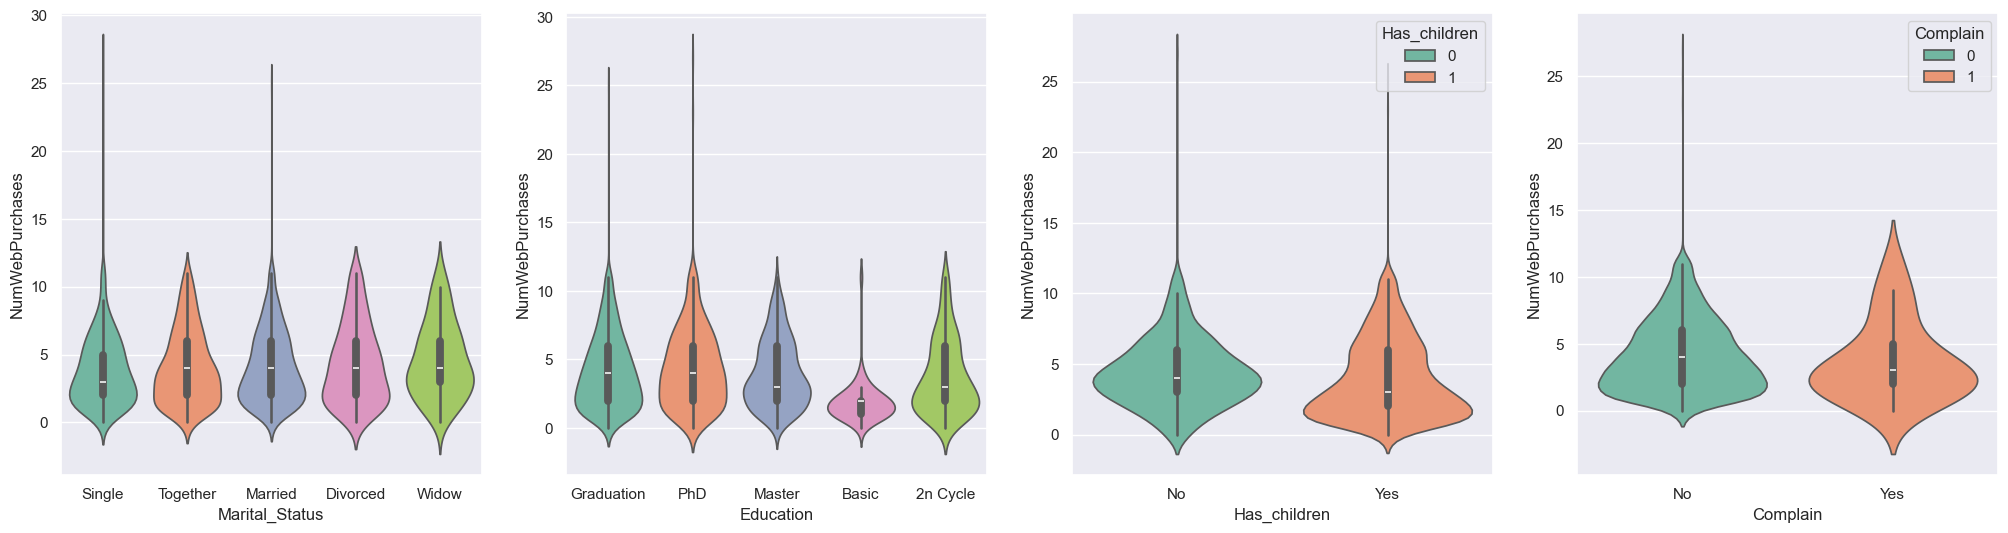

In [40]:
# Violin plots to see distribution of web purchases based on categorical parameters 
fig, ax = plt.subplots(nrows=1,ncols=len(cat_param), figsize = (25,6))

for i in enumerate(cat_param):
    sns.violinplot(data, x=i[1], y="NumWebPurchases",hue=i[1],ax=ax[i[0]])

ax[2].set_xticklabels(["No","Yes"])
ax[3].set_xticklabels(["No","Yes"])
plt.show()

C:\Users\windh\AppData\Local\Temp\ipykernel_11044\2901622674.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_11044\2901622674.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


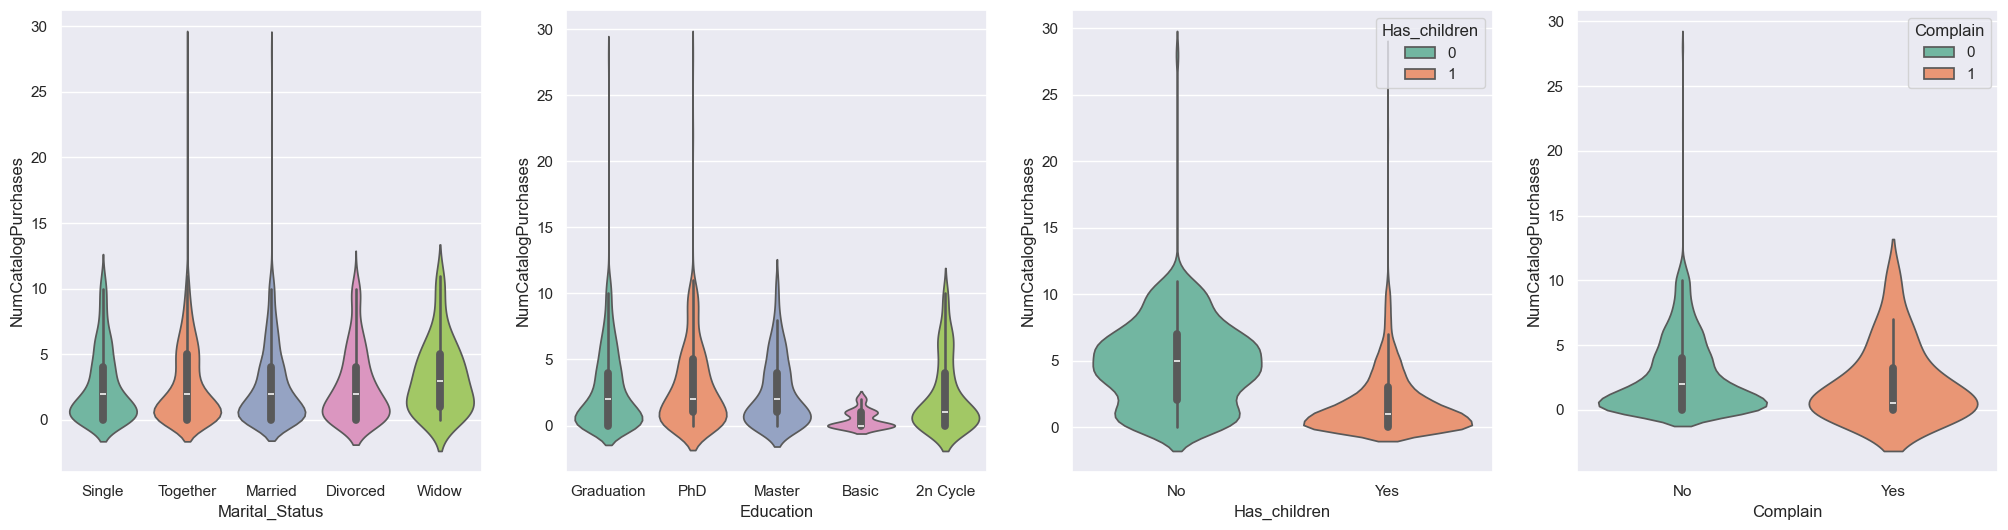

In [41]:
# Violin plots to see distribution of catalog purchases based on categorical parameters 
fig, ax = plt.subplots(nrows=1,ncols=len(cat_param), figsize = (25,6))

for i in enumerate(cat_param):
    sns.violinplot(data, x=i[1], y="NumCatalogPurchases",hue=i[1],ax=ax[i[0]])

ax[2].set_xticklabels(["No","Yes"])
ax[3].set_xticklabels(["No","Yes"])
plt.show()

C:\Users\windh\AppData\Local\Temp\ipykernel_11044\731477843.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_11044\731477843.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


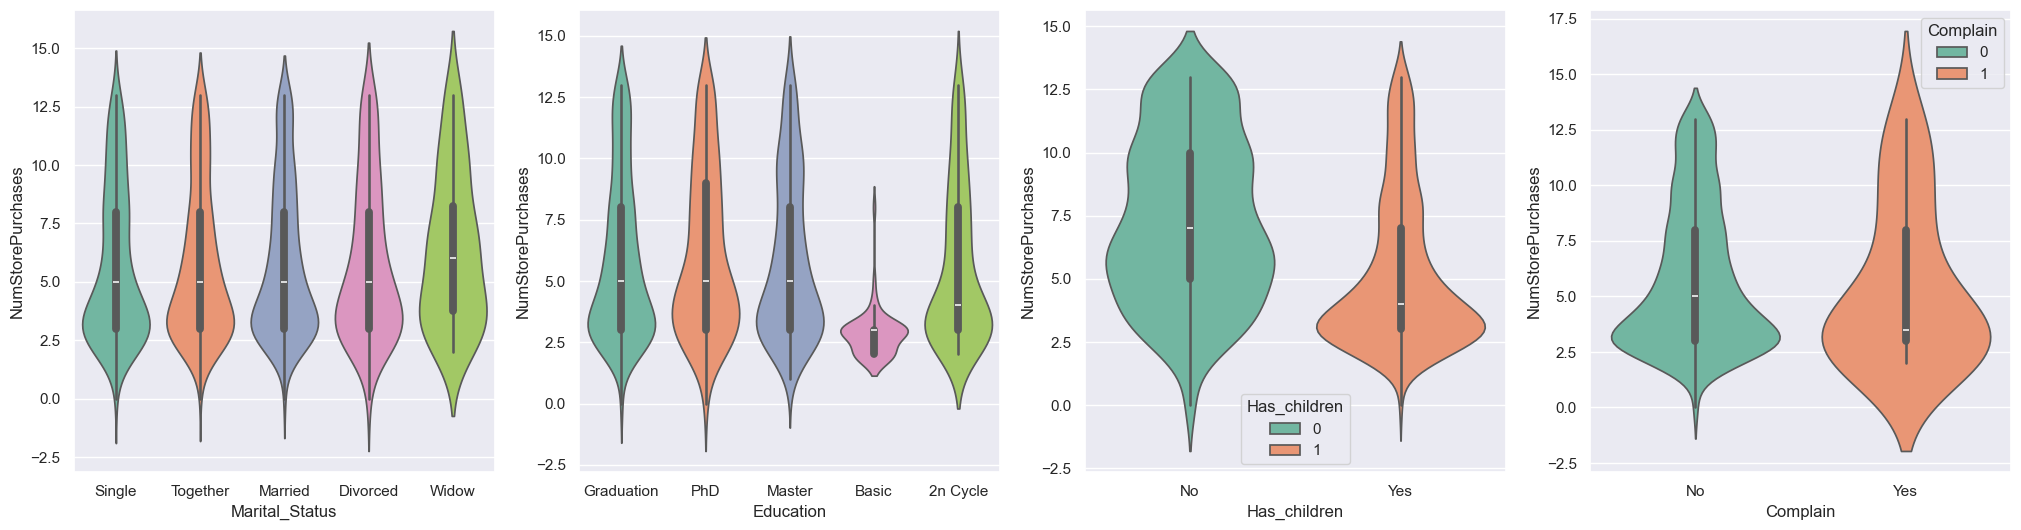

In [42]:
# Violin plots to see distribution of store purchases based on categorical parameters 
fig, ax = plt.subplots(nrows=1,ncols=len(cat_param), figsize = (25,6))

for i in enumerate(cat_param):
    sns.violinplot(data, x=i[1], y="NumStorePurchases",hue=i[1],ax=ax[i[0]])

ax[2].set_xticklabels(["No","Yes"])
ax[3].set_xticklabels(["No","Yes"])
plt.show()

In terms of education, it appears that customers with basic education overhwelmingly earn less and also spend less, which is to be expected. Customers without children on average also appear to earn and spend more than customers with children. The distributon of income/spending between customer marital statuses appear to be more even, however, widowed/divorced customers appear to earn and spend slightly more compared to customers with other marital statuses. 

Marital status, education, children nor complaints appear to affect location of purchases with the exception of people with basic education and people with children, which is in line with the fact that they tend to spend less in general. Interestingly however, people with children on average purchase items on deals more often than people without children. 

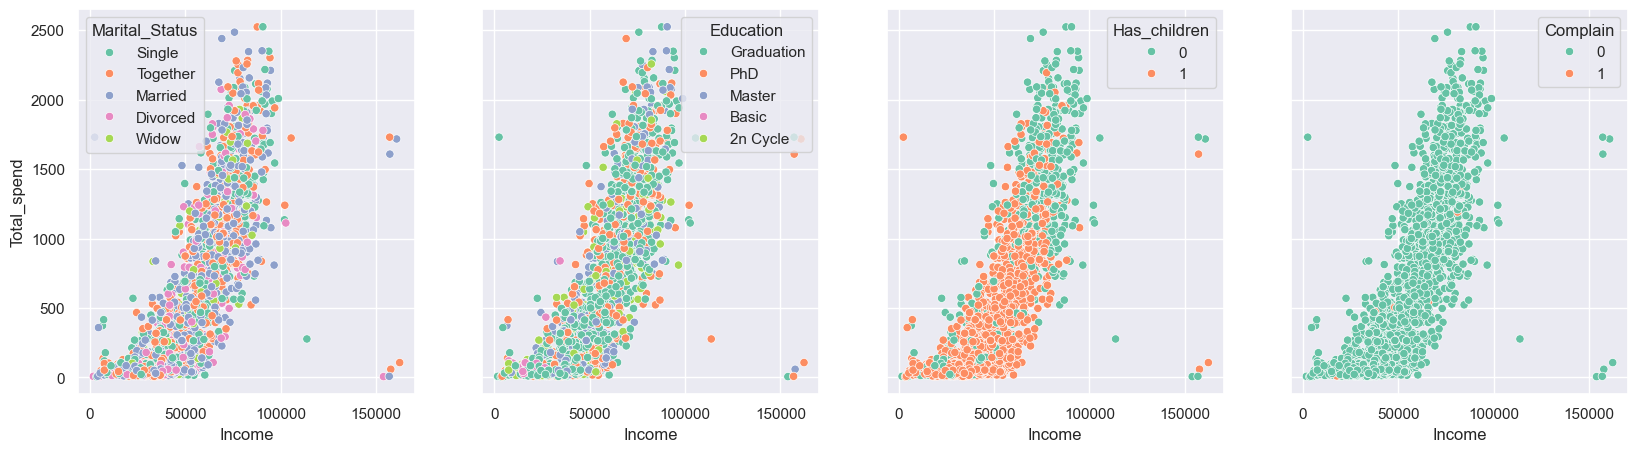

In [43]:
# Seeing relationship between income & total spend based on marital status, education, whether they complain and has children 
fig, ax = plt.subplots(1,ncols=len(cat_param), figsize=(20,5), sharex=True, sharey=True)

for i in enumerate(cat_param):
    sns.scatterplot(data,x="Income",y="Total_spend",hue=i[1],ax=ax[i[0]])    

plt.show()

Income and spending appear to be positively correlated (the higher the income, the higheor the spending). However, there doesn't seem to be any obvious groupings with the exception of customers with/without children where customers with children appear to earn less and spend less compared to customers without children. 

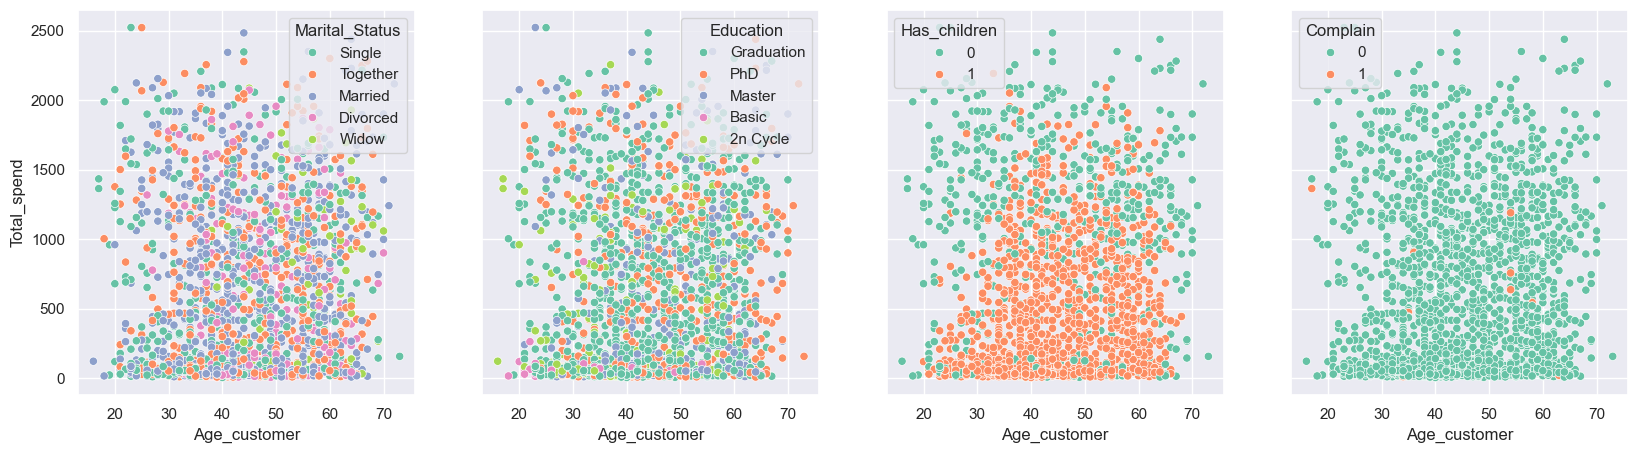

In [44]:
# Seeing relationship between age & total spend based on marital status, education, whether they complain and has children 

fig, ax = plt.subplots(1,ncols=len(cat_param), figsize=(20,5), sharex=True, sharey=True)

for i in enumerate(cat_param):
    sns.scatterplot(data,x="Age_customer",y="Total_spend",hue=i[1],ax=ax[i[0]])    

plt.show()


There doesn't seem to be any correlation between age and total spend and no obvious groupings. Although customers with children appear to be concentrated near the bottom of the total spend axis, meaning they tend to spend less compared to customers without children. 

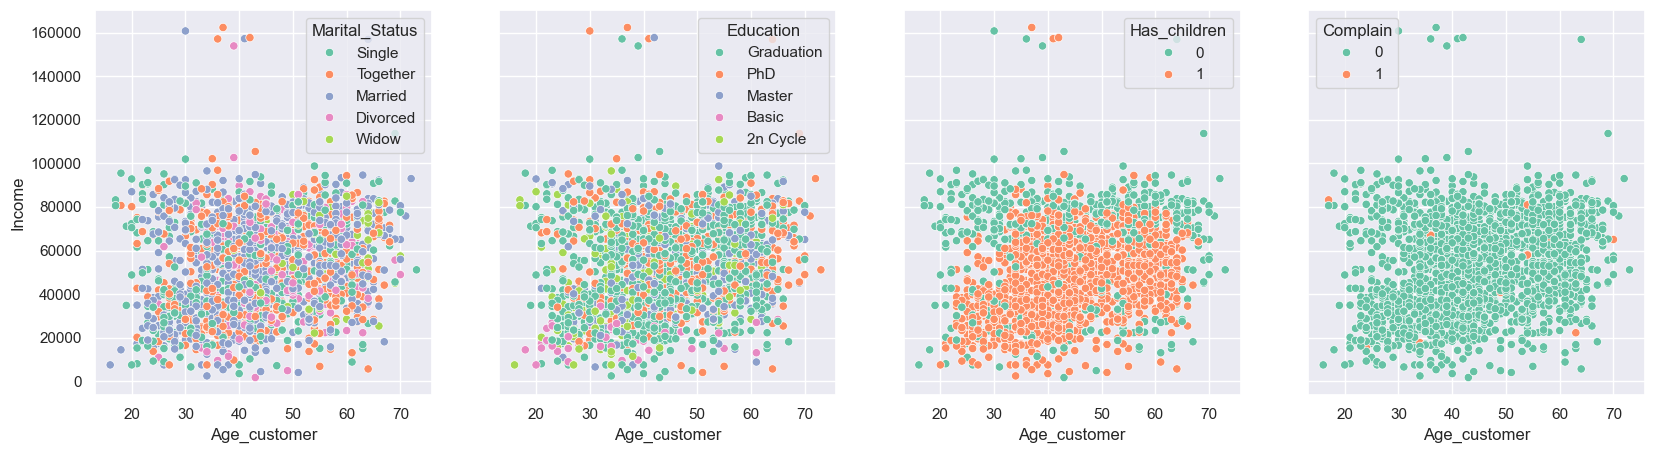

In [45]:
# Seeing relationship between age & income based on marital status, education, whether they complain and has children 

fig, ax = plt.subplots(1,ncols=len(cat_param), figsize=(20,5), sharex=True, sharey=True)

for i in enumerate(cat_param):
    sns.scatterplot(data,x="Age_customer",y="Income",hue=i[1],ax=ax[i[0]])    

plt.show()


There doesn't seem ot be any correlation between age and income and again, there appear to be no obvious groupings. 

In [51]:
##-------- PERFORMING K-MEANS CLUSTERING -------##

# Removing unrequired columns for clustering
reduced_data = data.drop(columns=["Year_Birth", "Dt_Customer"])

# Encoding categorical variables using one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1]),], remainder='passthrough')
new_data = ct.fit_transform(reduced_data)

for i in enumerate(ct.get_feature_names_out()):
    print(i)

(0, 'encoder__Education_2n Cycle')
(1, 'encoder__Education_Basic')
(2, 'encoder__Education_Graduation')
(3, 'encoder__Education_Master')
(4, 'encoder__Education_PhD')
(5, 'encoder__Marital_Status_Divorced')
(6, 'encoder__Marital_Status_Married')
(7, 'encoder__Marital_Status_Single')
(8, 'encoder__Marital_Status_Together')
(9, 'encoder__Marital_Status_Widow')
(10, 'remainder__Income')
(11, 'remainder__Kidhome')
(12, 'remainder__Teenhome')
(13, 'remainder__MntWines')
(14, 'remainder__MntFruits')
(15, 'remainder__MntMeatProducts')
(16, 'remainder__MntFishProducts')
(17, 'remainder__MntSweetProducts')
(18, 'remainder__MntGoldProds')
(19, 'remainder__NumDealsPurchases')
(20, 'remainder__NumWebPurchases')
(21, 'remainder__NumCatalogPurchases')
(22, 'remainder__NumStorePurchases')
(23, 'remainder__Complain')
(24, 'remainder__Num_children')
(25, 'remainder__Has_children')
(26, 'remainder__Total_spend')
(27, 'remainder__Age_customer')


In [83]:
# One-hot encoding increases data dimensionality, so we will scale the data next
sc = ColumnTransformer(transformers=[('scaler', StandardScaler(), slice(11, 28))], remainder='passthrough')
scaled_data = sc.fit_transform(new_data)

print(new_data[1,:])
print(scaled_data[1,:])

[0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 4.6344e+04 1.0000e+00
 1.0000e+00 1.1000e+01 1.0000e+00 6.0000e+00 2.0000e+00 1.0000e+00
 6.0000e+00 2.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00 0.0000e+00
 2.0000e+00 1.0000e+00 2.7000e+01 6.0000e+01]
[ 1.03969669e+00  9.08251342e-01 -8.71991367e-01 -6.37333353e-01
 -7.18477217e-01 -6.51530021e-01 -6.34499429e-01 -7.33625876e-01
 -1.66651238e-01 -1.12601610e+00 -5.71558422e-01 -1.17029778e+00
 -9.56729746e-02  1.40484529e+00  6.32455532e-01 -9.62758368e-01
  1.35313472e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  4.63440000e+04]


In [85]:
# Function to find optimal cluster number for model 
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias


<Axes: xlabel='clusters', ylabel='sum of squared distances'>

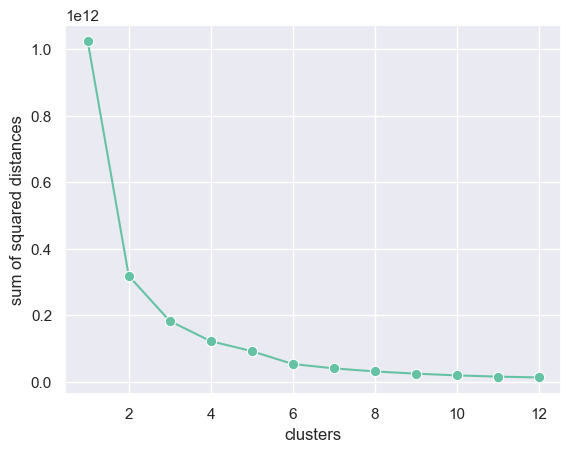

In [84]:
# New dataframe to store values
outputs = try_different_clusters(12, scaled_data)
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

# Visualising in line plot to find ideal number of clusters
sns.lineplot(distances, x="clusters", y="sum of squared distances", marker=".", markersize="15")

<Axes: xlabel='Income', ylabel='Total_spend'>

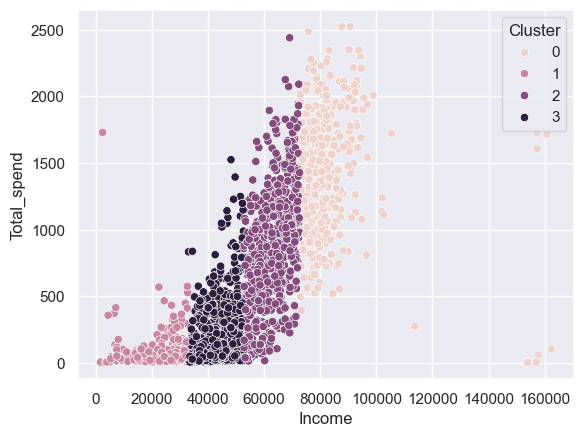

In [96]:
# 4 clusters appear to be the ideal number, so we will proceed with model training/fitting with 4 clusters
kmodel = KMeans(n_clusters = 4,init='k-means++',max_iter=400,random_state=42)
predictions = kmodel.fit_predict(scaled_data)
reduced_data["Cluster"] = predictions

# Visualising the clusters
sns.scatterplot(reduced_data, x="Income", y="Total_spend", hue="Cluster")

In [105]:
##-------- UNDERSTANDING THE CLUSTERS -------##

# Displaying means of continuous variables by cluster
reduced_data.drop(columns=["Education", "Marital_Status"]).groupby("Cluster").mean().T

Cluster,0,1,2,3
Income,82750.193548,23484.133333,62931.085843,42355.476969
Kidhome,0.071960,0.782796,0.201807,0.664190
Teenhome,0.238213,0.208602,0.721386,0.658247
MntWines,656.101737,18.060215,477.349398,124.249629
MntFruits,64.635236,5.780645,35.876506,8.166419
MntMeatProducts,470.148883,21.548387,206.617470,47.521545
MntFishProducts,90.977667,8.382796,50.106928,13.378900
MntSweetProducts,67.694789,5.731183,35.804217,8.943536
MntGoldProds,70.359801,16.264516,62.941265,28.053492
NumDealsPurchases,1.270471,2.032258,2.810241,2.665676
